<a href="https://colab.research.google.com/github/MaryamSyed/human-resources-retention-analysis/blob/master/Human_Resources_Retention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

%tensorflow_version 2.x

import tensorflow.keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout


file_name = "https://raw.githubusercontent.com/maryamsyed/human-resources-retention-analysis/master/hr_data.csv"
hr_df = pd.read_csv(file_name)

file_name = "https://raw.githubusercontent.com/maryamsyed/human-resources-retention-analysis/master/employee_satisfaction_evaluation.xlsx"
emp_satis_eval = pd.read_excel(file_name)

hr_df.head()

TensorFlow is already loaded. Please restart the runtime to change versions.


,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [0]:
hr_df.tail()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
14994,87670,2,151,3,0,1,0,support,low
14995,87673,2,160,3,0,1,0,support,low
14996,87679,2,143,3,0,1,0,support,low
14997,87681,6,280,4,0,1,0,support,low
14998,87684,2,158,3,0,1,0,support,low


In [0]:
hr_df.info()
hr_df.select_dtypes(exclude=['int','float']).columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
employee_id              14999 non-null int64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


Index(['department', 'salary'], dtype='object')

In [0]:
print(hr_df['department'].unique())
print(hr_df['salary'].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


In [0]:
len(hr_df)

14999

In [0]:
len(hr_df.columns)

9

In [0]:
hr_df.shape

(14999, 9)

In [0]:
emp_satis_eval.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


In [0]:
emp_satis_eval.shape

(14999, 3)

In [0]:
main_df = hr_df.set_index('employee_id').join(emp_satis_eval.set_index('EMPLOYEE #'))
main_df = main_df.reset_index()
main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [0]:
#main_df.isnull()
main_df[main_df.isnull().any(axis=1)]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,NaN,NaN
19,1140,5,262,5,0,1,0,sales,low,NaN,0.89
33,1230,2,140,3,0,1,0,hr,low,NaN,NaN
53,1340,2,132,3,0,1,0,support,low,NaN,NaN
72,22316,2,149,3,0,1,0,product_mng,high,NaN,NaN
92,1581,2,143,3,0,1,0,sales,low,NaN,NaN
107,17376,2,148,3,0,1,0,accounting,medium,NaN,NaN
120,1739,4,158,4,1,1,0,technical,low,NaN,NaN
137,1847,2,129,3,0,1,0,management,low,NaN,NaN
175,32923,4,164,2,0,1,0,sales,low,NaN,NaN


In [0]:
main_df.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14972.000000,14972.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.612830,0.716125
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.248714,0.171138
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.090000,0.360000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.440000,0.560000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.640000,0.720000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.820000,0.870000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
main_df.fillna(main_df.mean(),inplace=True)
main_df[main_df.isnull().any(axis=1)]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation


In [0]:
main_df.loc[main_df['employee_id']==3794]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,0.61283,0.716125


In [0]:
main_df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [0]:
main_df_final = main_df.drop(columns = 'employee_id')
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,5,223,5,0,1,0,sales,low,0.72,0.87
4,2,159,3,0,1,0,sales,low,0.37,0.52


In [0]:
main_df_final.groupby('department').sum()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,4683,248119,4256,164,273,3,758.17283,879.452250
RandD,3033,158030,2650,134,121,27,487.80000,560.446125
accounting,2934,154292,2702,96,204,14,446.68283,550.706125
hr,2701,146828,2480,89,215,15,442.53566,524.006125
management,2432,126787,2711,103,91,69,391.76566,456.234499
marketing,3164,171073,3063,138,203,43,530.62283,613.946125
product_mng,3434,180369,3135,132,198,0,559.19566,644.662250
sales,15634,831773,14631,587,1014,100,2543.77981,2938.236749
support,8479,447490,7563,345,555,20,1377.90849,1611.534499


In [0]:
main_df_final.groupby('department').mean()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445,0.617908,0.716750
RandD,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307,0.619822,0.712130
accounting,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253,0.582377,0.718000
hr,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298,0.598830,0.709075
management,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524,0.621850,0.724182
marketing,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117,0.618442,0.715555
product_mng,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000,0.619951,0.714703
sales,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155,0.614440,0.709719
support,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973,0.618173,0.722985


No handles with labels found to put in legend.


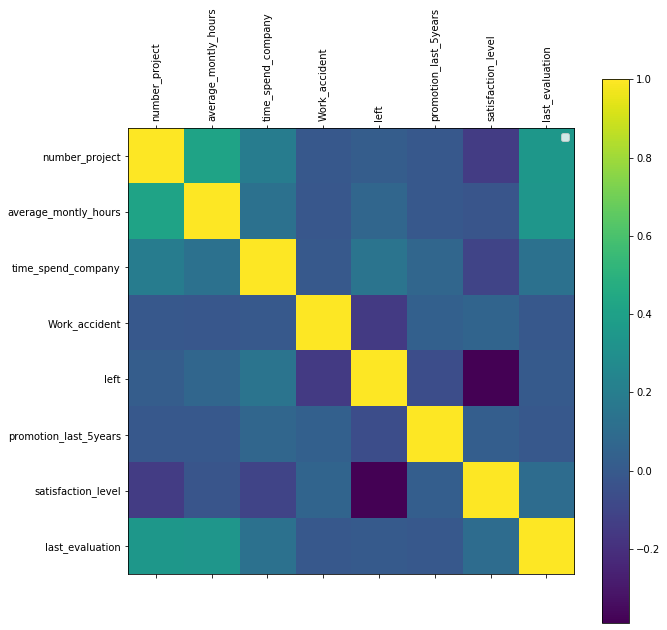

In [0]:
#Correlation matrix

def plot_corr(df,size=10):

  corr = df.corr()
  fig, ax = plt.subplots(figsize = (size, size))
  ax.legend()
  cax = ax.matshow(corr)
  fig.colorbar(cax)
  plt.xticks(range(len(corr.columns)),corr.columns,rotation = 'vertical')
  plt.yticks(range(len(corr.columns)),corr.columns)

plot_corr(main_df_final)

Preparing Datasets for ML Classifiers

In [0]:
#One Hot Encoding on Categorical Data

categorical = ['department','salary']
main_df_final = pd.get_dummies(main_df_final, columns = categorical, drop_first = True)
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1,5,262,6,0,1,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
2,7,272,4,0,1,0,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
3,5,223,5,0,1,0,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
4,2,159,3,0,1,0,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0


In [0]:
#Number of columns in dataset after one hot encoding

len(main_df_final.columns)

19

In [0]:
#Employees in the dataset who have left

len(main_df_final.loc[main_df_final['left']==1])

3571

In [0]:
#Removing label value from training data

X = main_df_final.drop(['left'],axis=1).values

#Assigning label values to dataset y

y = main_df_final['left'].values


In [0]:
#Splitting dataset in 70:30 ratio for training and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [0]:
#Normalizing data

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [0]:
df_train = pd.DataFrame(X_train)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.164863,1.443569,-1.026108,-0.413338,-0.149325,1.159920,0.321717,-0.236247,-0.228044,-0.231033,-0.21284,-0.244231,-0.252445,-0.620264,-0.419323,2.140469,1.026545,-0.874718
1,-0.648910,0.723391,-0.347743,-0.413338,-0.149325,1.563961,0.204020,-0.236247,-0.228044,-0.231033,-0.21284,-0.244231,-0.252445,-0.620264,-0.419323,2.140469,-0.974141,-0.874718
2,0.164863,1.083480,1.008985,-0.413338,-0.149325,0.877092,1.204440,-0.236247,4.385121,-0.231033,-0.21284,-0.244231,-0.252445,-0.620264,-0.419323,-0.467187,1.026545,-0.874718
3,0.164863,1.303534,-0.347743,-0.413338,-0.149325,0.392244,0.969047,-0.236247,-0.228044,-0.231033,-0.21284,-0.244231,-0.252445,1.612218,-0.419323,-0.467187,-0.974141,-0.874718
4,1.792409,-0.516916,0.330621,-0.413338,-0.149325,-1.587553,-1.149488,-0.236247,-0.228044,-0.231033,-0.21284,-0.244231,-0.252445,-0.620264,-0.419323,2.140469,-0.974141,1.143226


In [0]:
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04
mean,7.245900e-16,-2.733101e-16,1.634087e-16,5.837157e-18,3.788495e-16,3.025726e-14,3.818420e-14,-6.028821e-16,-7.121860e-16,5.858676e-16,5.237844e-16,4.688680e-16,-4.212482e-16,5.525207e-16,6.637545e-16,3.455343e-16,3.332678e-16,-7.241881e-16
std,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00
min,-1.462683e+00,-2.097307e+00,-1.026108e+00,-4.133384e-01,-1.493250e-01,-2.112805e+00,-2.091060e+00,-2.362468e-01,-2.280439e-01,-2.310328e-01,-2.128396e-01,-2.442310e-01,-2.524450e-01,-6.202636e-01,-4.193227e-01,-4.671874e-01,-9.741413e-01,-8.747177e-01
25%,-6.489102e-01,-8.970102e-01,-3.477433e-01,-4.133384e-01,-1.493250e-01,-6.986645e-01,-9.140956e-01,-2.362468e-01,-2.280439e-01,-2.310328e-01,-2.128396e-01,-2.442310e-01,-2.524450e-01,-6.202636e-01,-4.193227e-01,-4.671874e-01,-9.741413e-01,-8.747177e-01
50%,1.648629e-01,-1.679242e-02,-3.477433e-01,-4.133384e-01,-1.493250e-01,1.094159e-01,2.747584e-02,-2.362468e-01,-2.280439e-01,-2.310328e-01,-2.128396e-01,-2.442310e-01,-2.524450e-01,-6.202636e-01,-4.193227e-01,-4.671874e-01,-9.741413e-01,-8.747177e-01
75%,9.786359e-01,8.834303e-01,3.306210e-01,-4.133384e-01,-1.493250e-01,8.366883e-01,9.101991e-01,-2.362468e-01,-2.280439e-01,-2.310328e-01,-2.128396e-01,-2.442310e-01,-2.524450e-01,1.612218e+00,-4.193227e-01,-4.671874e-01,1.026545e+00,1.143226e+00
max,2.606182e+00,2.183752e+00,4.400807e+00,2.419325e+00,6.696802e+00,1.563961e+00,1.675226e+00,4.232862e+00,4.385121e+00,4.328390e+00,4.698375e+00,4.094485e+00,3.961259e+00,1.612218e+00,2.384798e+00,2.140469e+00,1.026545e+00,1.143226e+00


Logistic Regression Model

In [0]:
model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 79.67%
[[3206  261]
 [ 654  379]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.88      3467
           1       0.59      0.37      0.45      1033

    accuracy                           0.80      4500
   macro avg       0.71      0.65      0.66      4500
weighted avg       0.78      0.80      0.78      4500



Random Forest Model

In [0]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
score = model.score(X_test, y_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 97.89%
[[3457   10]
 [  85  948]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3467
           1       0.99      0.92      0.95      1033

    accuracy                           0.98      4500
   macro avg       0.98      0.96      0.97      4500
weighted avg       0.98      0.98      0.98      4500



Deep Learning Classifier

In [0]:
model = Sequential()

model.add(Dense(9, kernel_initializer = "uniform", activation = "relu", input_dim=18))
model.add(Dense(1, kernel_initializer = "uniform", activation = 'sigmoid'))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
#Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 9)                 171       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 10        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [0]:
#Training Deep Learning Classifier

batch_size = 10
epochs = 25

history = model.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 10499 samples, validate on 4500 samples
Epoch 1/25
10499/10499 [==============================] - 2s 210us/sample - loss: 0.4433 - acc: 0.7892 - val_loss: 0.3297 - val_acc: 0.8271
Epoch 2/25
10499/10499 [==============================] - 2s 179us/sample - loss: 0.2983 - acc: 0.8321 - val_loss: 0.2667 - val_acc: 0.8404
Epoch 3/25
10499/10499 [==============================] - 2s 197us/sample - loss: 0.2497 - acc: 0.9109 - val_loss: 0.2342 - val_acc: 0.9324
Epoch 4/25
10499/10499 [==============================] - 2s 191us/sample - loss: 0.2227 - acc: 0.9386 - val_loss: 0.2140 - val_acc: 0.9407
Epoch 5/25
10499/10499 [==============================] - 2s 194us/sample - loss: 0.2054 - acc: 0.9476 - val_loss: 0.2016 - val_acc: 0.9462
Epoch 6/25
10499/10499 [==============================] - 2s 201us/sample - loss: 0.1939 - acc: 0.9495 - val_loss: 0.1948 - val_acc: 0.9453
Epoch 7/25
10499/10499 [==============================] - 2s 196us/sample - loss: 0.1843 - acc: 0.9522 - val_lo

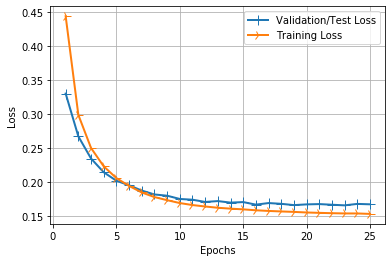

In [0]:
#Plotting loss charts

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label = 'Training Loss')
plt.setp(line1, linewidth = 2.0, marker = '+', markersize = 10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize = 10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()


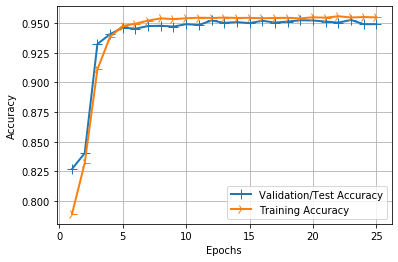

In [0]:
#Plotting accuracy charts

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1,len(loss_values)+1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [0]:
#Classification Report and Confusion Matrix

predictions = model.predict(X_test)
predictions = (predictions>0.5)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[3328  139]
 [  90  943]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      3467
           1       0.87      0.91      0.89      1033

    accuracy                           0.95      4500
   macro avg       0.92      0.94      0.93      4500
weighted avg       0.95      0.95      0.95      4500



In [0]:
#Training a deeper model

model2 = Sequential()

# Hidden Layer 1
model2.add(Dense(270, activation='relu', input_dim=18, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

# Hidden Layer 1
model2.add(Dense(180, activation='relu', input_dim=18, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

# Hidden Layer 2
model2.add(Dense(90, activation = 'relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3, noise_shape=None, seed=None))

model2.add(Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 270)               5130      
_________________________________________________________________
dropout (Dropout)            (None, 270)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 180)               48780     
_________________________________________________________________
dropout_1 (Dropout)          (None, 180)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 90)                16290     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 91        
Total params: 70,291
Trainable params: 70,291
Non-trainable params: 0
__________________________________________________

In [0]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
batch_size = 10
epochs = 25

history = model.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 10499 samples, validate on 4500 samples
Epoch 1/25
10499/10499 [==============================] - 2s 211us/sample - loss: 1.2557 - acc: 0.8973 - val_loss: 0.1828 - val_acc: 0.9553
Epoch 2/25
10499/10499 [==============================] - 2s 207us/sample - loss: 1.2340 - acc: 0.8952 - val_loss: 0.2085 - val_acc: 0.9382
Epoch 3/25
10499/10499 [==============================] - 2s 205us/sample - loss: 1.2359 - acc: 0.8977 - val_loss: 0.1912 - val_acc: 0.9518
Epoch 4/25
10499/10499 [==============================] - 2s 199us/sample - loss: 1.2646 - acc: 0.8949 - val_loss: 0.2072 - val_acc: 0.9358
Epoch 5/25
10499/10499 [==============================] - 2s 199us/sample - loss: 1.2749 - acc: 0.8971 - val_loss: 0.1930 - val_acc: 0.9522
Epoch 6/25
10499/10499 [==============================] - 2s 202us/sample - loss: 1.2381 - acc: 0.8987 - val_loss: 0.1904 - val_acc: 0.9504
Epoch 7/25
10499/10499 [==============================] - 2s 199us/sample - loss: 1.2376 - acc: 0.8992 - val_lo

In [0]:
predictions = model2.predict(X_test)
predictions = (predictions > 0.5)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[2881  586]
 [ 715  318]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.82      3467
           1       0.35      0.31      0.33      1033

    accuracy                           0.71      4500
   macro avg       0.58      0.57      0.57      4500
weighted avg       0.70      0.71      0.70      4500

